In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import math
from functions import *
sns.set_style('whitegrid')

In [12]:
benchmarks = ["^NSEI","^NSEMDCP50","^GSPC"]
start_date = '2023-01-01'
end_date = '2023-12-31'
INITIAL_AMT_INVESTED = 10000

In [13]:
benchmark_prices = fetch_data(benchmarks, start_date=start_date, end_date=end_date)

In [17]:
benchmark_prices = benchmark_prices.bfill(axis=0)
benchmark_prices = benchmark_prices.ffill(axis=0)

<Axes: xlabel='Date'>

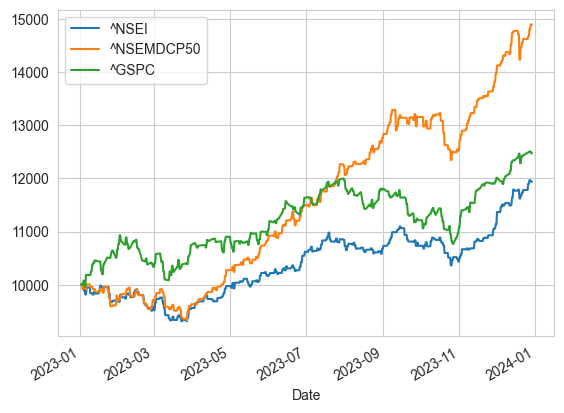

In [24]:
bm_shares = INITIAL_AMT_INVESTED/benchmark_prices.iloc[0,:]
bm_value = bm_shares*benchmark_prices
bm_value.plot()

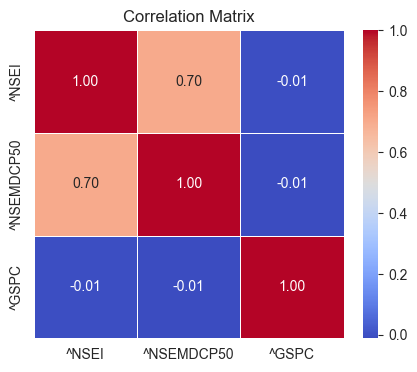

In [26]:
bm_log_returns = np.log(benchmark_prices/benchmark_prices.shift(1))
bm_correlation_matrix = bm_log_returns.corr()
plt.figure(figsize=(5,4))
sns.heatmap(bm_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()